In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') # importation des données.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Il n y a aucun NaN  selon cette méthode, nous observons par contre que certaines données comme celle de la colonne Churn qui devraient être en format numérique ont été renseignées en format object, dans cette configuration, si on renseigne de l'espace comme donnée dans cette colonne, elle ne sera pas considérée comme une valeur NaN par la méthode isnull(), on va alors s'assurer qu'il n y ait aucun espace dans les colonnes instanciées en object.

In [4]:
df=df.apply(lambda x: x.apply(lambda y: np.nan if ( isinstance(y,str) and y.strip()=='' ) else y) )
# On applique apply sur chaque colonne ici notée comme x puisque au début on écrit df.apply, le apply s'applique bien au colonne. 
#Ensuite à chaque colonne y, on applique la méthode de remplacement pour éviter tout espace.

In [5]:
df.isnull().sum() # Et bien il y avait 11 valeurs non renseignées qui se cachaient :) 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
del df['customerID'] # elle ne sert à rien dans la décision de churn ou pas

In [8]:
df['TotalCharges'].describe()

count     7032
unique    6530
top       20.2
freq        11
Name: TotalCharges, dtype: object

La valeur de l'écart-type (std) est très grande, les données sont dispersées et il semble avoir des outliers.Pour faire un remplacement des valeurs NaN dans cette configuration, on optera un remplacement par la médianne qui est moins sensibles aux valeurs extrêmes.

In [9]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [10]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].quantile(0.5))
df['TotalCharges'].isnull().sum()

np.int64(0)

                                                     Visualisation des donnée
Dans cette partie, nous allons représenter les données continues avec boxplot et les données discrètes avec countplot pour une meuilleur visualisation.                                                    

In [11]:
def plot_distribution(df,column_target):
    count=[]
    box=[]
    for column in df.columns:
        if (column==column_target):
            continue
        if( len( df[column].unique() )<=4 ):
            count.append(column)
        elif( len( df[column].unique() )>4 ):
            box.append(column)

    #i=1
    for column in count:
        #plt.subplot(len(count)//2 + len(count)%2, 2 ,i)
        plt.figure()
        sns.countplot(x=df[column_target],hue=df[column])
        plt.title(column+' distribution')
        #i=i+1
        plt.show()


   # j=1
    for column in box:
        #plt.subplot(len(box)//2 + len(box)%2, 2 ,j)
        plt.figure()
        sns.boxplot(x=df[column_target],y=df[column])
        plt.title(column+' distribution')
        #j=j+1
        plt.show()
    
        
# Cette fonction peut servir pour représenter graphiquement les données de notre dataset en une seul fois, par contre,elle ne sera pas utilisée pour la suite.
# Car il serait bien de mettre une interprétation à la suite de chaque graphe, chose qui n'est pas possible si les graphes se chevauchent.
# Pour lancer la fonction, vous pouvez excécuter cette ligne : plot_distribution(df,'Churn')

Text(0.5, 1.0, 'gender distribution')

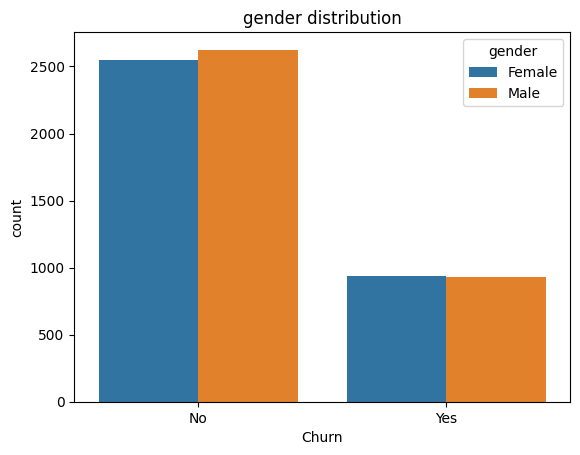

In [12]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['gender'])
plt.title('gender distribution')

Chez les personnes qui ont Churn, il y a autant d'homme que de femme. La variable gender ne semble pas être une variable déterminante dans la prédiction du Churn.

Text(0.5, 1.0, 'SeniorCitizen distribution')

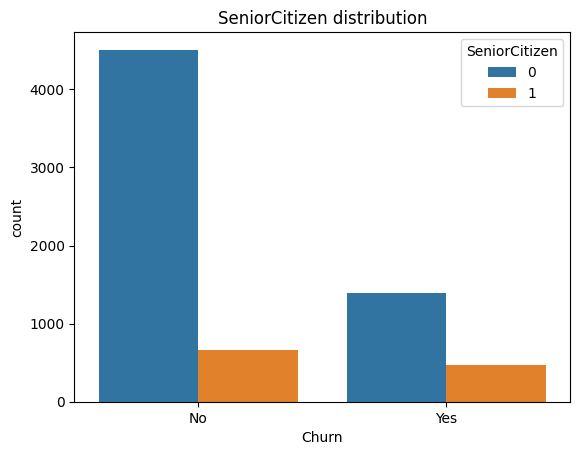

In [13]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['SeniorCitizen'])
plt.title('SeniorCitizen distribution')

Il semblerait que les Churn soient en majorité non SeniorCitizen. Existerait il un service qui soit accessible pour les SeniorCitizen et pas pour les non SeniorCitizen? En regardant chez les no churn, on s'aperçoit que le nombre de no SenioCitizen est très supérieur à celui de SeniorCitizen.
Le fait d'être ou non SeniorCitizen ne justifie pas néccésairement le Churn.

Text(0.5, 1.0, 'Partner distribution')

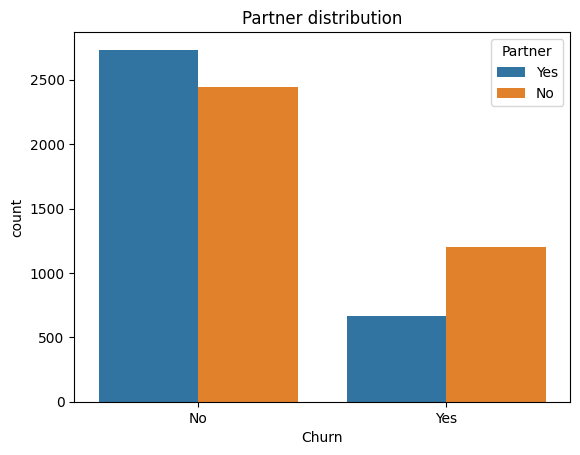

In [14]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['Partner'])
plt.title('Partner distribution')

Le graphe nous montre que le fait d'avoir le label 1 pour partner peut légèrement influencer la décision de Churn, en effet, dans le groupe Churn, il y a plus de no partner que de partner. De plus, en regardant sur la partie no churn, on s'aperçoit que le nombre de partner est beaucoup plus élevé que celui de no partner même si la différence est assez faible.
La variable partner joue un rôle minime mais non négligeable dans la décision du Churn, les clients auront moins tendance à vouloir partir s'ils ont ce label. 

Text(0.5, 1.0, 'Dependents distribution')

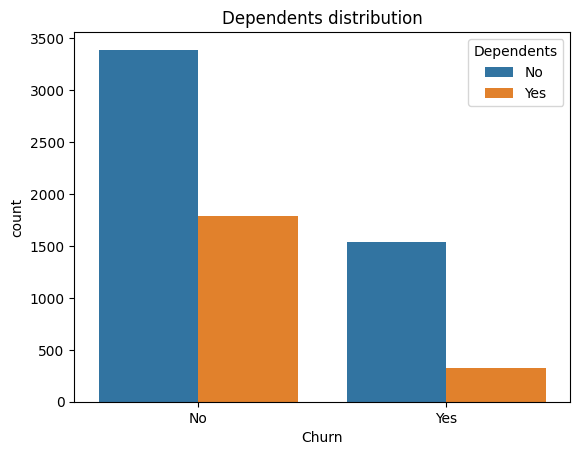

In [15]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['Dependents'])
plt.title('Dependents distribution')

Parmies les personnes Churn, plusieurs d'entre eux n'ont pas de personnes à charge (Dependents=No) cela laisse penser que le forfait proposé par l'entreprise donne plus d'avantages à ceux qui sont en famille.
Chez les Churn, se sont les Dependents=No qui dominent mais ici, la proportion entre les Dependents et No Dependents est plus faible que dans le groupe des Churn.
La variable Dependents joue un rôle assez important dans la décision de Churn.

Text(0.5, 1.0, 'PhoneService distribution')

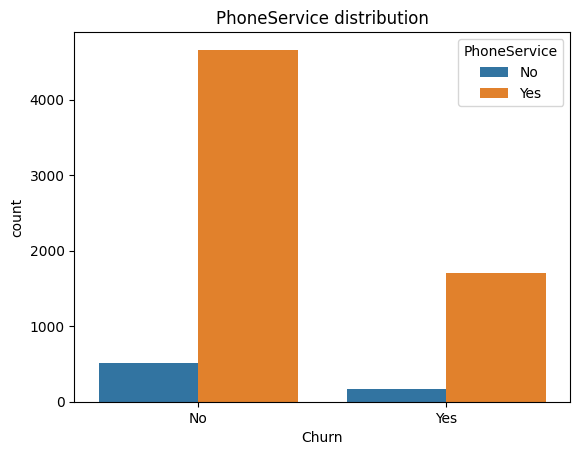

In [16]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['PhoneService'])
plt.title('PhoneService distribution')

Chez les no Churn, pratiquement tout le monde à un phone service, le phone service servirait donc à fidéliser les clients, ce qui est normal.
Chez les Churn, la grande majorité ont un PhoneService, ce PhoneService serait à l'origine du Churn ? Si oui, alors pourquoi parmies les non Churn le nombre de personne ayant accès à ce service est si élevé? 

In [17]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Et bien, nous tenons la réponse, une très très grande partie des clients ont le phoneService ce qui explique cette répartition.
En définitive, le PhoneService n'influence pas tellement la décision de Churn ou pas.

Text(0.5, 1.0, 'MultipleLines distribution')

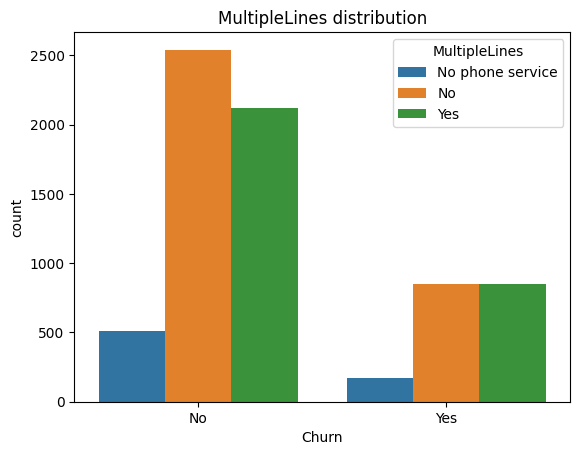

In [18]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['MultipleLines'])
plt.title('MultipleLines distribution')

Parmies les Churn, les nombes de personnes ayant le label Yes et No pour le MultipleLines sont équivalents. Le nombre de pesonne ayant le label No phone sevice est par contre très faible par rapport aux nombres des deux autres labels, en regardant chez les no churn, on voit que le nombre de personne ayant ce label est élevé. A première vue, les clients qui n'ont pas de Phone service présente un taux de Churn plus faible.

Text(0.5, 1.0, 'InternetService distribution')

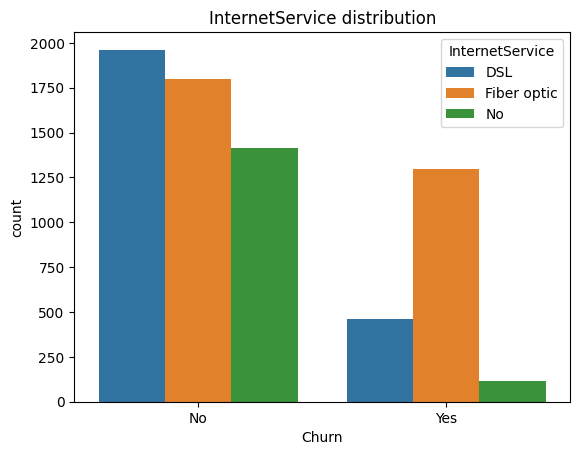

In [19]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['InternetService'])
plt.title('InternetService distribution')

In [20]:
df[df['Churn']=='Yes']['InternetService'].value_counts()

InternetService
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64

Les Churn ont beaucoup plus opté pour le service internet Fiber optic, cela laisse croire que les clients rencontrent un poblème avec ce service internet mais lequel? 

In [21]:
print(df[ (df['Churn']=='Yes') & (df['InternetService']=='Fiber optic') ].describe())
print()
print(df[ (df['Churn']=='Yes') & (df['InternetService']!='Fiber optic') ].describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    1297.000000  1297.000000     1297.000000   1297.000000
mean        0.303007    20.196608       88.126484   1914.616384
std         0.459735    20.067649       11.882834   2046.711293
min         0.000000     1.000000       67.750000     68.500000
25%         0.000000     3.000000       78.800000    273.750000
50%         0.000000    13.000000       87.550000   1111.650000
75%         1.000000    33.000000       98.400000   2952.850000
max         1.000000    72.000000      118.350000   8684.800000

       SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     572.000000  572.000000      572.000000     572.00000
mean        0.145105   12.951049       43.410490     663.75778
std         0.352515   17.245758       16.730444    1049.09469
min         0.000000    1.000000       18.850000      18.85000
25%         0.000000    1.000000       25.375000      48.58750
50%         0.000000    4.000000       45.300

Parmi les churn, ceux qui utilisent le service Fiber optic payent beaucoup plus que ceux qui utilisent les autres services internet. Pour les utilisateurs de Fiber optic, le prix minimum de MonthlyCharge payé est de 67,75 (devise utilisée) contre 16,73 pour les non-utilisateurs de ce service. Le prix maximum pour les utilisateurs du service est de 118,35 contre 92,45 pour les non-utilisateurs. Pour la colonne TotalCharges, des observations similaires peuvent être faites. L'un des problèmes de ce service internet est donc son prix qui semble être plus élevé que celui des autres services. Toutefois, ce service internet est probablement très performant, d'où la hausse de prix. Il ne convient pas à des utilisateurs lambda qui n'ont pas besoin d'une performance aussi élevée. Il faudrait proposer ce produit à d'autres types d'utilisateurs, comme des grandes startups ou des écoles d'ingénieurs, qui ont des ressources suffisantes pour ce genre de service. Ce genre de service est plus rentable pour eux.

Text(0.5, 1.0, 'OnlineSecurity distribution')

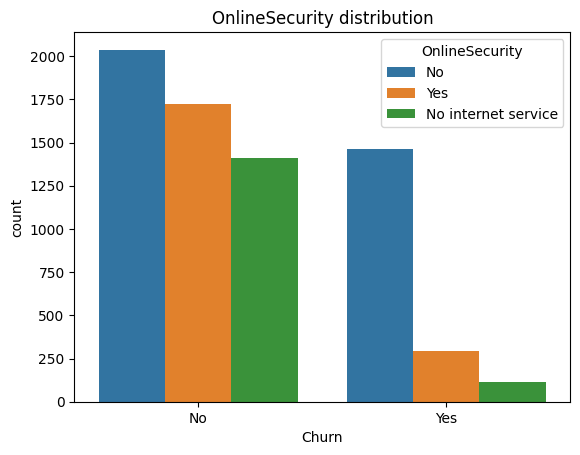

In [22]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['OnlineSecurity'])
plt.title('OnlineSecurity distribution')

Comme nous pouvons le voir, les personnes ne disposant pas de sécurité en ligne sont beaucoup plus susceptibles de faire du churn, ce qui n'est pas très étonnant puisqu'elles ressentent un manque de sécurité lors de l'utilisation du service.
En revanche, les non-churn comptent beaucoup plus de personnes n'ayant pas de sécurité en ligne. Cela ne brouille en rien notre analyse ; ce résultat suggère simplement que la majorité des utilisateurs sont des utilisateurs lambda qui n'ont pas nécessairement besoin d'une sécurité en ligne pour leurs tâches basiques.
Le fait de ne pas posséder de sécurité en ligne pousse bel et bien les personnes à faire du churn.

Text(0.5, 1.0, 'OnlineBackup distribution')

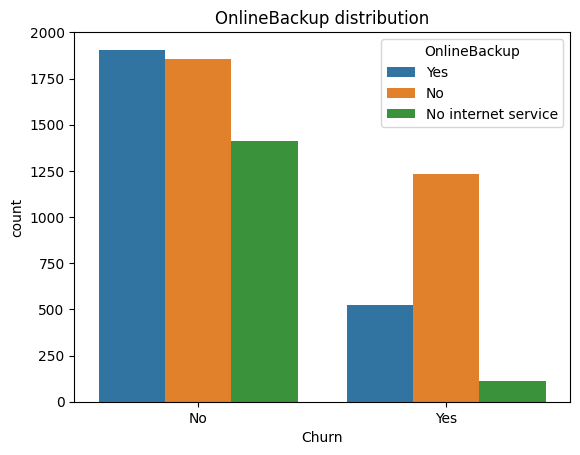

In [23]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['OnlineBackup'])
plt.title('OnlineBackup distribution')

Ici s'applique un raisonnement similaire, sinon identique, au dernier cas : les personnes ne possédant pas de sauvegarde en ligne (OnlineBackup) sont beaucoup plus susceptibles de faire du churn.
Les personnes non-churn comptent en effet un grand nombre de personnes avec le même label, mais cela suggère simplement que le service n'est pas utilisé par tout le monde (comme par des utilisateurs lambda).

Text(0.5, 1.0, 'DeviceProtection distribution')

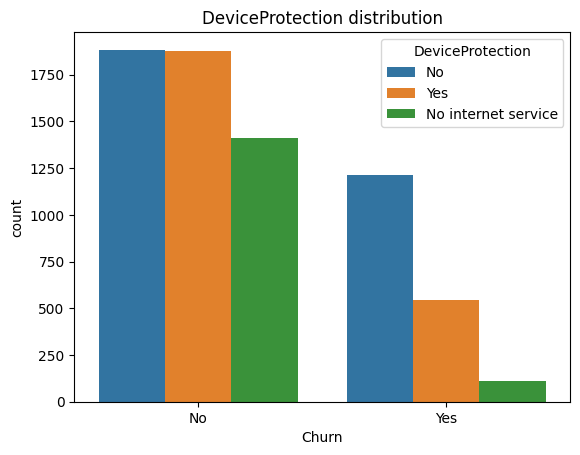

In [24]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['DeviceProtection'])
plt.title('DeviceProtection distribution')

Une interprétation similaire à celle des cas précédents s’applique à Device Protection.

Text(0.5, 1.0, 'TechSupport distribution')

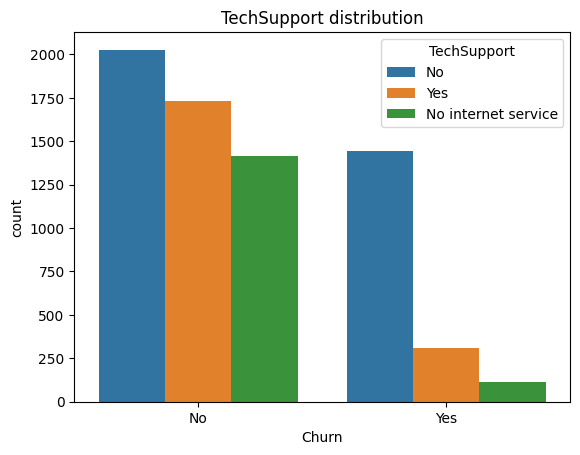

In [25]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['TechSupport'])
plt.title('TechSupport distribution')

Un raisonnement similaire à celui des cas précédents est appliqué pour TechSupport.

Text(0.5, 1.0, 'StreamingTV distribution')

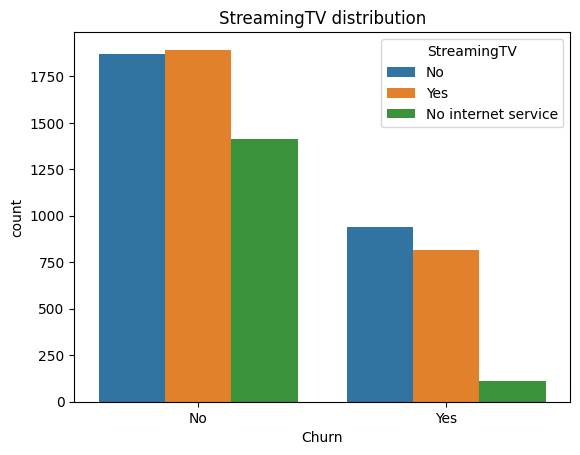

In [26]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['StreamingTV'])
plt.title('StreamingTV distribution')

In [27]:
#calcul du taux de Churn pour  StreamingTV==No
StreamingTV_rate_No= (len(df[(df['StreamingTV']=='No')&(df['Churn']=='Yes')])) /(len(df[df['StreamingTV']=='No']))

#Calcul du taux de Churn pour les StreamingTV==Yes
StreamingTV_rate_Yes= (len(df[(df['StreamingTV']=='Yes')&(df['Churn']=='Yes')])) /(len(df[df['StreamingTV']=='Yes']))

#calcul du taux de Churn Pour les StreamingTV==No internet Service
StreamingTV_rate_NIS= (len(df[(df['StreamingTV']=='No internet service')&(df['Churn']=='Yes')])) /(len(df[df['StreamingTV']=='No internet service']))

print('StreamingTV_rate_No:',StreamingTV_rate_No,'\n','StreamingTV_rate_Yes:',StreamingTV_rate_Yes,'\n','StreamingTV_rate_NIS:',StreamingTV_rate_NIS)

StreamingTV_rate_No: 0.33523131672597867 
 StreamingTV_rate_Yes: 0.30070188400443293 
 StreamingTV_rate_NIS: 0.07404980340760157


Label "StreamingTV = No" : Le fait que l’utilisateur ait ce label entraîne qu’il a environ 33,5% de chance de churn. Autrement dit, sur 100 clients sans service StreamingTV, environ 34 devraient quitter le service.

Label "StreamingTV = Yes" : Pour un utilisateur possédant ce label, la probabilité de churn est d’environ 30,1%. Cela se traduit par environ 30 clients sur 100 qui risquent de churner, indiquant une légère amélioration par rapport aux clients sans ce service.

Label "No internet service" (NIS) : Enfin, si un utilisateur dispose du label "No internet service", il n’a que 7,4% de chance de churn. Cela signifie que parmi 100 clients sans service internet (et donc sans accès à des services comme StreamingTV), moins de 8 devraient quitter, ce qui suggère une fidélisation beaucoup plus forte dans ce segment.

Text(0.5, 1.0, 'StreamingMovies distribution')

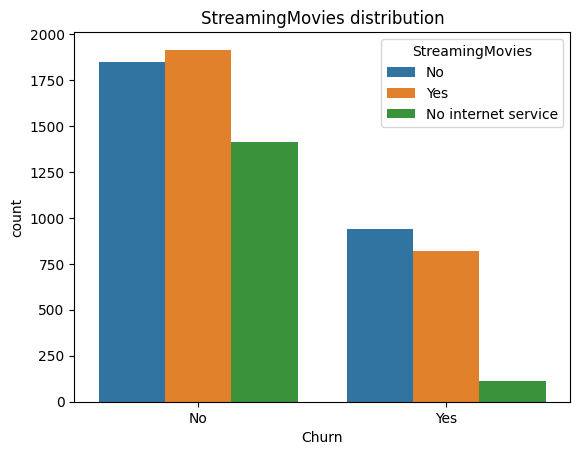

In [28]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['StreamingMovies'])
plt.title('StreamingMovies distribution')

In [29]:
#calcul du taux de Churn pour  StreamingTV==No
StreamingMovies_rate_No= (len(df[(df['StreamingMovies']=='No')&(df['Churn']=='Yes')])) /(len(df[df['StreamingMovies']=='No']))

#Calcul du taux de Churn pour les StreamingTV==Yes
StreamingMovies_rate_Yes= (len(df[(df['StreamingMovies']=='Yes')&(df['Churn']=='Yes')])) /(len(df[df['StreamingMovies']=='Yes']))

#calcul du taux de Churn Pour les StreamingTV==No internet Service
StreamingMovies_rate_NIS= (len(df[(df['StreamingMovies']=='No internet service')&(df['Churn']=='Yes')])) /(len(df[df['StreamingMovies']=='No internet service']))

print('StreamingMovies_rate_No:',StreamingMovies_rate_No,'\n','StreamingMovies_rate_Yes:',StreamingMovies_rate_Yes,'\n','StreamingMovies_rate_NIS:',StreamingMovies_rate_NIS)

StreamingMovies_rate_No: 0.33680430879712747 
 StreamingMovies_rate_Yes: 0.29941434846266474 
 StreamingMovies_rate_NIS: 0.07404980340760157


Avec de tels résultats, on applique un raisonnement similaire à celui de la dernière fois.

Text(0.5, 1.0, 'Contract distribution')

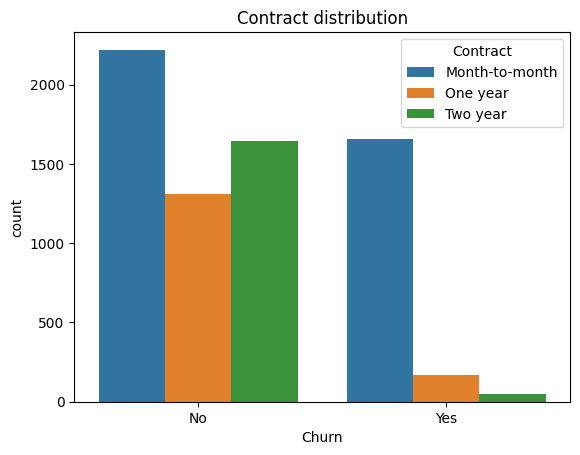

In [30]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['Contract'])
plt.title('Contract distribution')

In [31]:

Contract_rate_Month= (len(df[(df['Contract']=='Month-to-month')&(df['Churn']=='Yes')])) /(len(df[df['Contract']=='Month-to-month']))


Contract_rate_One_Year= (len(df[(df['Contract']=='One year')&(df['Churn']=='Yes')])) /(len(df[df['Contract']=='One year']))


Contract_rate_Two_Year= (len(df[(df['Contract']=='Two year')&(df['Churn']=='Yes')])) /(len(df[df['Contract']=='Two year']))

print('Contract_rate_Month:',Contract_rate_Month,'\n','Contract_rate_One_Year:',Contract_rate_One_Year,'\n','Contract_rate_Two_Year:',Contract_rate_Two_Year)

Contract_rate_Month: 0.4270967741935484 
 Contract_rate_One_Year: 0.11269517990495587 
 Contract_rate_Two_Year: 0.02831858407079646


Les personnes ayant un contrat de type Month-to-Month sont plus nombreuses parmi les churns, ce qui est logique : avec ce type d’abonnement, le client est beaucoup plus susceptible de se désabonner dès le mois suivant. Laissons parler les chiffres :

Contract_rate_Month : 42,7 %

Contract_rate_One_Year : 11,3 %

Contract_rate_Two_Year : 2,8 %

Label "Contract = Month-to-Month" : Le fait d’avoir ce contrat implique environ 42,7 % de probabilité de churn ! Autrement dit, sur 100 clients avec un abonnement mensuel, environ 43 risquent de quitter le service.

Label "Contract = One Year" : Pour ce contrat, la probabilité de churn chute à 11,3 %, ce qui représente environ 11 clients sur 100. C’est une nette amélioration par rapport à l’abonnement mensuel.

Label "Contract = Two Year" : Enfin, pour les clients avec un abonnement de deux ans, le taux de churn tombe à 2,8 %, soit moins de 3 personnes sur 100. Cela suggère une forte fidélisation de ce segment.

Conclusion : Proposer aux clients des contrats d’un an ou de deux ans semble être une piste sérieuse pour réduire le churn. Cela pourrait être mis en place via des offres incitatives ou des réductions tarifaires pour encourager l’engagement à long terme, il faudrait par contre voir si le fait de proposer ce genre de réduction n'est pas plus coûteux que de voir un client partir.

Text(0.5, 1.0, 'PaperlessBilling distribution')

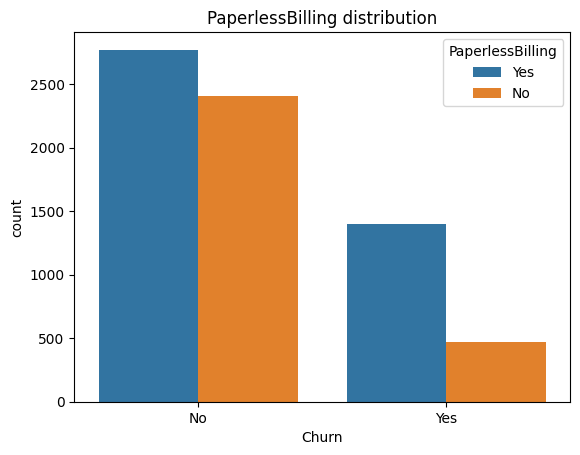

In [32]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['PaperlessBilling'])
plt.title('PaperlessBilling distribution')

In [33]:
PaperlessBilling_rate_Yes= (len(df[(df['PaperlessBilling']=='Yes')&(df['Churn']=='Yes')])) /(len(df[df['PaperlessBilling']=='Yes']))
PaperlessBilling_rate_No= (len(df[(df['PaperlessBilling']=='No')&(df['Churn']=='Yes')])) /(len(df[df['PaperlessBilling']=='No']))
print('PaperlessBilling _rate_Yes:',PaperlessBilling_rate_Yes,'\n','PaperlessBilling_rate_No:',PaperlessBilling_rate_No)

PaperlessBilling _rate_Yes: 0.33565092304003835 
 PaperlessBilling_rate_No: 0.1633008356545961


Les personnes qui reçoivent leurs factures par voie électronique sont beaucoup plus exposées au risque de churn par rapport à celles qui les reçoivent au format papier. Cela peut sembler logique : un client peut se sentir plus connecté à l’entreprise en recevant une facture papier, plutôt qu’un simple e-mail.
Laissons parler les chiffres :

PaperlessBilling_rate_Yes : 34 %

PaperlessBilling_rate_No : 16,3 %

Label "PaperlessBilling = Yes" : Le fait de recevoir des factures électroniques implique une probabilité de churn d’environ 34 %. Autrement dit, sur 100 clients concernés, 34 risquent de quitter le service.

Label "PaperlessBilling = No" : Pour les clients recevant des factures papier, ce taux chute à 16,3 %, soit environ 16 clients sur 100. C’est une nette amélioration par rapport à la facturation électronique, ce qui suggère une meilleure fidélisation.

Conclusion : Proposer aux clients des factures papier plutôt qu’électroniques semble être une piste sérieuse pour réduire le churn.
Cependant, il reste à évaluer si cette stratégie est économiquement viable : les coûts d’impression et d’envoi peuvent être élevés, et il faudra comparer ces dépenses à la perte que représente un client qui se désabonne, et oui le papier ça coûte de l'argent.

Text(0.5, 1.0, 'PaymentMethod distribution')

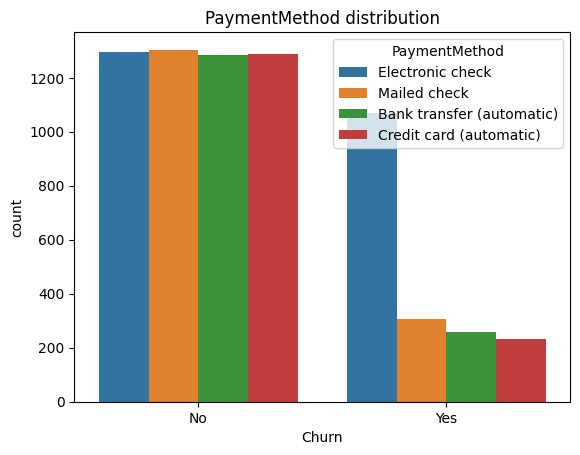

In [34]:
plt.figure()
sns.countplot(x=df['Churn'],hue=df['PaymentMethod'])
plt.title('PaymentMethod distribution')

Parmi les no Churn, les paiement sont plus diversifiés.

In [35]:
PaymentMethod_rate_EC= (len(df[(df['PaymentMethod']=='Electronic check')&(df['Churn']=='Yes')])) /(len(df[df['PaymentMethod']=='Electronic check']))

PaymentMethod_rate_MC= (len(df[(df['PaymentMethod']=='Mailed check')&(df['Churn']=='Yes')])) /(len(df[df['PaymentMethod']=='Mailed check']))

PaymentMethod_rate_BT= (len(df[(df['PaymentMethod']=='Bank transfer (automatic)')&(df['Churn']=='Yes')])) /(len(df[df['PaymentMethod']=='Bank transfer (automatic)']))

PaymentMethod_rate_CC= (len(df[(df['PaymentMethod']=='Credit card (automatic)')&(df['Churn']=='Yes')])) /(len(df[df['PaymentMethod']=='Credit card (automatic)']))

print('PaymentMethod_rate_EC:',PaymentMethod_rate_EC,'\n','PaymentMethod_rate_MC:',PaymentMethod_rate_MC,'\n','PaymentMethod_rate_BT:',PaymentMethod_rate_BT,'\n','PaymentMethod_rate_CC:',PaymentMethod_rate_CC)

PaymentMethod_rate_EC: 0.4528541226215645 
 PaymentMethod_rate_MC: 0.19106699751861042 
 PaymentMethod_rate_BT: 0.16709844559585493 
 PaymentMethod_rate_CC: 0.15243101182654403


Parmi les churns, les clients qui paient par Electronic check sont nettement plus nombreux. Cette méthode de paiement, contrairement aux options automatiques comme la carte bancaire ou le virement automatique, requiert une opération manuelle à chaque transaction. Cela peut rendre le processus de règlement plus contraignant pour le client, ce qui peut expliquer son départ.

Jetons un œil aux chiffres :

PaymentMethod_rate_EC (Electronic check) : 45,3 %

PaymentMethod_rate_MC (Mailed check) : 19,1 %

PaymentMethod_rate_BT (Bank transfer - automatic) : 16,7 %

PaymentMethod_rate_CC (Credit card - automatic) : 15,2 %
Interprétation :

Le taux de churn le plus élevé est observé chez les utilisateurs de chèque électronique, avec près de 1 client sur 2 qui quitte le service.

En comparaison, les méthodes automatiques comme le virement bancaire et la carte bancaire sont associées à un churn beaucoup plus faible (~15-17 %).

Même les utilisateurs du chèque papier s’en sortent mieux, avec un taux de churn de 19,1 %.

Conclusion : Proposer ou inciter les clients à passer à une méthode de paiement automatique (comme la carte ou le virement) pourrait être une stratégie efficace de fidélisation. Cela simplifie la gestion pour le client, évite les oublis de paiement et réduit potentiellement le churn.

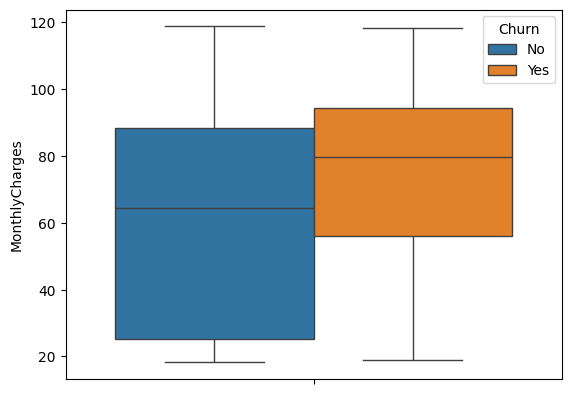

In [36]:
plt.figure()
sns.boxplot(y=df['MonthlyCharges'],hue=df['Churn'])
plt.show()

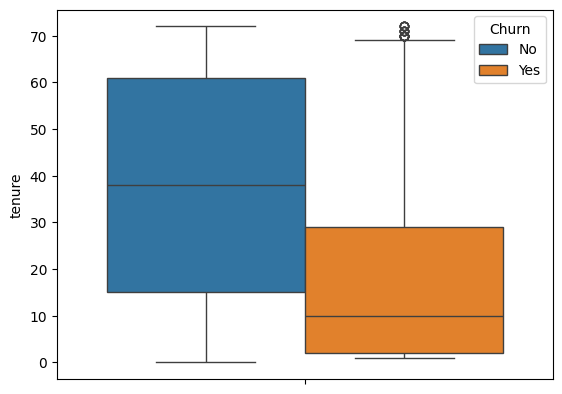

In [37]:
plt.figure()
sns.boxplot(y=df['tenure'],hue=df['Churn'])
plt.show()

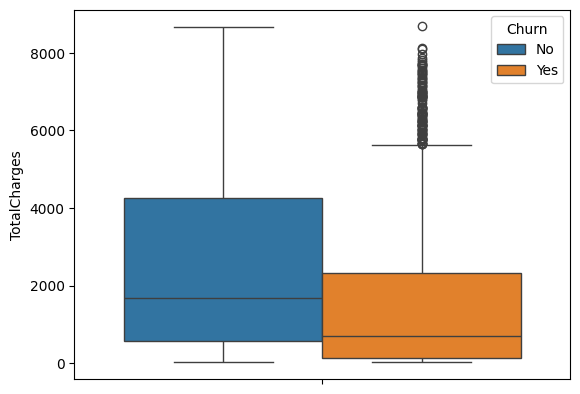

In [38]:
plt.figure()
sns.boxplot(y=df['TotalCharges'],hue=df['Churn'])
plt.show()

Les clients churn ont généralement passé moins de temps que les clients non churn, ce qui est logique puisque leur durée d’engagement (tenure) est écourtée par leur départ.

On observe également que les churn ont payé des mensualités plus élevées que les non churn, comme nous l’avons déjà remarqué dans l’analyse de la colonne InternetService, notamment avec le label Fiber optic.

Sur l’ensemble, les churn ont tendance à payer moins au total (TotalCharges) car ils quittent le service plus tôt.
Cependant, une proportion non négligeable de churn a tout de même payé des montants très élevés, ce qui peut constituer un facteur de frustration et motiver leur décision de partir.

In [39]:
df.groupby('Churn').describe()['MonthlyCharges']

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [40]:
df.groupby('Churn').describe()['TotalCharges']

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2552.882494,2327.590132,18.80,579.575,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.500,703.550,2331.30,8684.80


Traitement des données

In [41]:
column_map=[]
column_dummie=[]
for column in df.columns:
    if(len(df[column].unique())==2 ):
        column_map.append(column)
    elif( (len(df[column].unique())==3) | (len(df[column].unique())==4) ):
        column_dummie.append(column)
    print(column,(df[column].unique()),'\n')

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  

In [42]:
del column_map[1] # SeniorCitizen est déja encoder en 0 1 
del column_map[0]# gender n'est pas au format yes no
column_map

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

In [43]:
column_dummie

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [44]:
for column in column_map:
    df[column]=df[column].map({'Yes':1,'No':0})
df['gender']=df['gender'].map({'Male':1,'Female':0})

In [45]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [46]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [48]:
df2=df.copy() # Par mesure de prudence à cause des opérations qui vont suivre.

In [49]:
MultipleLines_dummies=pd.get_dummies(df['MultipleLines'],drop_first=True,prefix='MultipleLines').astype(int)
MultipleLines_dummies

,MultipleLines_No phone service,MultipleLines_Yes
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,0,1
7039,0,1
7040,1,0
7041,0,1


In [50]:
df=pd.concat([df,MultipleLines_dummies],axis=1)
del MultipleLines_dummies
del df['MultipleLines']
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,1,0,1,0,DSL,No,Yes,No,...,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,1,0,0,0,34,1,DSL,Yes,No,Yes,...,No,No,One year,0,Mailed check,56.95,1889.50,0,0,0
2,1,0,0,0,2,1,DSL,Yes,Yes,No,...,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,0
3,1,0,0,0,45,0,DSL,Yes,No,Yes,...,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0
4,0,0,0,0,2,1,Fiber optic,No,No,No,...,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,DSL,Yes,No,Yes,...,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,0,1
7039,0,0,1,1,72,1,Fiber optic,No,Yes,Yes,...,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0,0,1
7040,0,0,1,1,11,0,DSL,Yes,No,No,...,No,No,Month-to-month,1,Electronic check,29.60,346.45,0,1,0
7041,1,1,1,0,4,1,Fiber optic,No,No,No,...,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,0,1


In [51]:
InternetService_dummies=pd.get_dummies(df['InternetService'],drop_first=True,prefix='InternetService').astype(int)
InternetService_dummies

,InternetService_Fiber optic,InternetService_No
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
7038,0,0
7039,1,0
7040,0,0
7041,1,0


In [52]:
df=pd.concat([df,InternetService_dummies],axis=1)
del InternetService_dummies
del df['InternetService']
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,No,Yes,No,No,...,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0,0
1,1,0,0,0,34,1,Yes,No,Yes,No,...,One year,0,Mailed check,56.95,1889.50,0,0,0,0,0
2,1,0,0,0,2,1,Yes,Yes,No,No,...,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0
3,1,0,0,0,45,0,Yes,No,Yes,Yes,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,No,No,No,No,...,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,No,Yes,Yes,...,One year,1,Mailed check,84.80,1990.50,0,0,1,0,0
7039,0,0,1,1,72,1,No,Yes,Yes,No,...,One year,1,Credit card (automatic),103.20,7362.90,0,0,1,1,0
7040,0,0,1,1,11,0,Yes,No,No,No,...,Month-to-month,1,Electronic check,29.60,346.45,0,1,0,0,0
7041,1,1,1,0,4,1,No,No,No,No,...,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,1,0


In [53]:
OnlineSecurity_dummies=pd.get_dummies(df['OnlineSecurity'],drop_first=True,prefix='OnlineSecurity').astype(int)
OnlineSecurity_dummies

,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
7038,0,1
7039,0,0
7040,0,1
7041,0,0


In [54]:
df=pd.concat([df,OnlineSecurity_dummies],axis=1)
del OnlineSecurity_dummies
del df['OnlineSecurity']
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,0,0,1,0,1,0,Yes,No,No,No,...,Electronic check,29.85,29.85,0,1,0,0,0,0,0
1,1,0,0,0,34,1,No,Yes,No,No,...,Mailed check,56.95,1889.50,0,0,0,0,0,0,1
2,1,0,0,0,2,1,Yes,No,No,No,...,Mailed check,53.85,108.15,1,0,0,0,0,0,1
3,1,0,0,0,45,0,No,Yes,Yes,No,...,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1
4,0,0,0,0,2,1,No,No,No,No,...,Electronic check,70.70,151.65,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,No,Yes,Yes,Yes,...,Mailed check,84.80,1990.50,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,Yes,Yes,No,Yes,...,Credit card (automatic),103.20,7362.90,0,0,1,1,0,0,0
7040,0,0,1,1,11,0,No,No,No,No,...,Electronic check,29.60,346.45,0,1,0,0,0,0,1
7041,1,1,1,0,4,1,No,No,No,No,...,Mailed check,74.40,306.60,1,0,1,1,0,0,0


In [55]:
OnlineBackup_dummies=pd.get_dummies(df['OnlineBackup'],drop_first=True,prefix='OnlineBackup').astype(int)
OnlineBackup_dummies

,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
7038,0,0
7039,0,1
7040,0,0
7041,0,0


In [56]:
df=pd.concat([df,OnlineBackup_dummies],axis=1)
del OnlineBackup_dummies
del df['OnlineBackup']
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,0,1,0,1,0,No,No,No,No,...,29.85,0,1,0,0,0,0,0,0,1
1,1,0,0,0,34,1,Yes,No,No,No,...,1889.50,0,0,0,0,0,0,1,0,0
2,1,0,0,0,2,1,No,No,No,No,...,108.15,1,0,0,0,0,0,1,0,1
3,1,0,0,0,45,0,Yes,Yes,No,No,...,1840.75,0,1,0,0,0,0,1,0,0
4,0,0,0,0,2,1,No,No,No,No,...,151.65,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,Yes,Yes,Yes,...,1990.50,0,0,1,0,0,0,1,0,0
7039,0,0,1,1,72,1,Yes,No,Yes,Yes,...,7362.90,0,0,1,1,0,0,0,0,1
7040,0,0,1,1,11,0,No,No,No,No,...,346.45,0,1,0,0,0,0,1,0,0
7041,1,1,1,0,4,1,No,No,No,No,...,306.60,1,0,1,1,0,0,0,0,0


In [57]:
DeviceProtection_dummies=pd.get_dummies(df['DeviceProtection'],drop_first=True,prefix='DeviceProtection').astype(int)
DeviceProtection_dummies

,DeviceProtection_No internet service,DeviceProtection_Yes
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
7038,0,1
7039,0,1
7040,0,0
7041,0,0


In [58]:
df=pd.concat([df,DeviceProtection_dummies],axis=1)
del DeviceProtection_dummies
del df['DeviceProtection']
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,StreamingTV,StreamingMovies,Contract,...,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
0,0,0,1,0,1,0,No,No,No,Month-to-month,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,34,1,No,No,No,One year,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,No,No,No,Month-to-month,...,0,0,0,0,0,1,0,1,0,0
3,1,0,0,0,45,0,Yes,No,No,One year,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,0,2,1,No,No,No,Month-to-month,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,Yes,Yes,One year,...,0,1,0,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,No,Yes,Yes,One year,...,0,1,1,0,0,0,0,1,0,1
7040,0,0,1,1,11,0,No,No,No,Month-to-month,...,1,0,0,0,0,1,0,0,0,0
7041,1,1,1,0,4,1,No,No,No,Month-to-month,...,0,1,1,0,0,0,0,0,0,0


In [59]:
TechSupport_dummies=pd.get_dummies(df['TechSupport'],drop_first=True,prefix='TechSupport').astype(int)
TechSupport_dummies

,TechSupport_No internet service,TechSupport_Yes
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
7038,0,1
7039,0,0
7040,0,0
7041,0,0


In [60]:
df=pd.concat([df,TechSupport_dummies],axis=1)
del TechSupport_dummies
del df['TechSupport']
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,...,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes
0,0,0,1,0,1,0,No,No,Month-to-month,1,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,34,1,No,No,One year,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,2,1,No,No,Month-to-month,1,...,0,0,0,1,0,1,0,0,0,0
3,1,0,0,0,45,0,No,No,One year,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,0,0,2,1,No,No,Month-to-month,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,Yes,One year,1,...,0,0,0,1,0,0,0,1,0,1
7039,0,0,1,1,72,1,Yes,Yes,One year,1,...,1,0,0,0,0,1,0,1,0,0
7040,0,0,1,1,11,0,No,No,Month-to-month,1,...,0,0,0,1,0,0,0,0,0,0
7041,1,1,1,0,4,1,No,No,Month-to-month,1,...,1,0,0,0,0,0,0,0,0,0


In [61]:
StreamingTV_dummies=pd.get_dummies(df['StreamingTV'],drop_first=True,prefix='StreamingTV').astype(int)
StreamingTV_dummies

,StreamingTV_No internet service,StreamingTV_Yes
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7038,0,1
7039,0,1
7040,0,0
7041,0,0


In [62]:
df=pd.concat([df,StreamingTV_dummies],axis=1)
del StreamingTV_dummies
del df['StreamingTV']
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,...,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,0,0,1,0,1,0,No,Month-to-month,1,Electronic check,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,34,1,No,One year,0,Mailed check,...,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,2,1,No,Month-to-month,1,Mailed check,...,0,1,0,1,0,0,0,0,0,0
3,1,0,0,0,45,0,No,One year,0,Bank transfer (automatic),...,0,1,0,0,0,1,0,1,0,0
4,0,0,0,0,2,1,No,Month-to-month,1,Electronic check,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,One year,1,Mailed check,...,0,1,0,0,0,1,0,1,0,1
7039,0,0,1,1,72,1,Yes,One year,1,Credit card (automatic),...,0,0,0,1,0,1,0,0,0,1
7040,0,0,1,1,11,0,No,Month-to-month,1,Electronic check,...,0,1,0,0,0,0,0,0,0,0
7041,1,1,1,0,4,1,No,Month-to-month,1,Mailed check,...,0,0,0,0,0,0,0,0,0,0


In [63]:
StreamingMovies_dummies=pd.get_dummies(df['StreamingMovies'],drop_first=True,prefix='StreamingMovies').astype(int)
StreamingMovies_dummies

,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7038,0,1
7039,0,1
7040,0,0
7041,0,0


In [64]:
df=pd.concat([df,StreamingMovies_dummies],axis=1)
del StreamingMovies_dummies
del df['StreamingMovies']
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,Month-to-month,1,Electronic check,29.85,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,34,1,One year,0,Mailed check,56.95,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,2,1,Month-to-month,1,Mailed check,53.85,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,45,0,One year,0,Bank transfer (automatic),42.30,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,Month-to-month,1,Electronic check,70.70,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,One year,1,Mailed check,84.80,...,0,0,0,1,0,1,0,1,0,1
7039,0,0,1,1,72,1,One year,1,Credit card (automatic),103.20,...,0,1,0,1,0,0,0,1,0,1
7040,0,0,1,1,11,0,Month-to-month,1,Electronic check,29.60,...,0,0,0,0,0,0,0,0,0,0
7041,1,1,1,0,4,1,Month-to-month,1,Mailed check,74.40,...,0,0,0,0,0,0,0,0,0,0


In [65]:
Contract_dummies=pd.get_dummies(df['Contract'],drop_first=True,prefix='Contract').astype(int)
Contract_dummies

,Contract_One year,Contract_Two year
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,1,0
7039,1,0
7040,0,0
7041,0,0


In [66]:
df=pd.concat([df,Contract_dummies],axis=1)
del Contract_dummies
del df['Contract']
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,1,Electronic check,29.85,29.85,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,34,1,0,Mailed check,56.95,1889.50,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,2,1,1,Mailed check,53.85,108.15,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,45,0,0,Bank transfer (automatic),42.30,1840.75,...,0,1,0,1,0,0,0,0,1,0
4,0,0,0,0,2,1,1,Electronic check,70.70,151.65,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,Mailed check,84.80,1990.50,...,0,1,0,1,0,1,0,1,1,0
7039,0,0,1,1,72,1,1,Credit card (automatic),103.20,7362.90,...,0,1,0,0,0,1,0,1,1,0
7040,0,0,1,1,11,0,1,Electronic check,29.60,346.45,...,0,0,0,0,0,0,0,0,0,0
7041,1,1,1,0,4,1,1,Mailed check,74.40,306.60,...,0,0,0,0,0,0,0,0,0,0


In [67]:
PaymentMethod_dummies=pd.get_dummies(df['PaymentMethod'],drop_first=True,prefix='PaymentMethod').astype(int)
PaymentMethod_dummies

,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0
...,...,...,...
7038,0,0,1
7039,1,0,0
7040,0,1,0
7041,0,0,1


In [68]:
df=pd.concat([df,PaymentMethod_dummies],axis=1)
del PaymentMethod_dummies
del df['PaymentMethod']
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


In [69]:
df.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

In [70]:
df.info() # Tout semble en ordre

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

In [71]:
df1=df.copy()
del df2
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler=StandardScaler()
df1[['MonthlyCharges','TotalCharges','tenure']]=scaler.fit_transform(df1[['MonthlyCharges','TotalCharges','tenure']])
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,1,0.665992,-0.128655,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,1.613701,1,1,1.277533,2.243151,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,-0.870241,0,1,-1.168632,-0.854469,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,-1.155283,1,1,0.320338,-0.872062,1,...,0,0,0,0,0,0,0,0,0,1


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
from sklearn.metrics import confusion_matrix,classification_report

In [77]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11,stratify=y)

In [79]:
rfc=RandomForestClassifier(random_state=11,max_features=8,min_samples_split=25,min_samples_leaf=2)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=8, min_samples_leaf=2, min_samples_split=25,
                       random_state=11)

[[956  79]
 [199 175]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.69      0.47      0.56       374

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



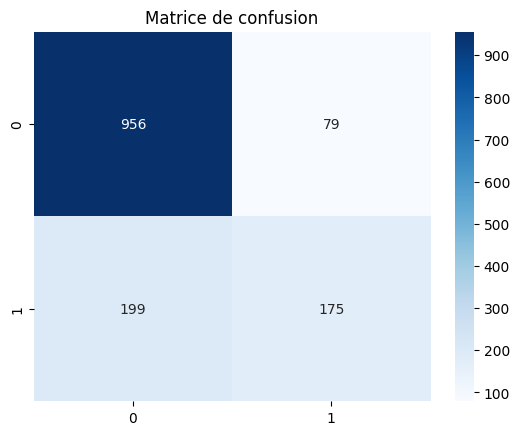

In [80]:
print(confusion_matrix(y_test,rfc.predict(X_test)))
print(classification_report(y_test,rfc.predict(X_test)))

plt.figure()
sns.heatmap(confusion_matrix(y_test,rfc.predict(X_test)),annot=True,cmap='Blues',fmt='.0f')
plt.title('Matrice de confusion')
plt.show()

La performence est assez bonne pour qu'on s'arrête ici mais on va tout de même essayer d'améliorer le modèle.

In [81]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={
'min_samples_split':[10,20,5],
'min_samples_leaf':[2,4,8],
'n_estimators':[100,400],
'max_features': [None,2,'sqrt'],
'class_weight':[None,'balanced']
}
grid=GridSearchCV(
    RandomForestClassifier(random_state=11),
    param_grid,
    cv=6,
    scoring='f1',
    n_jobs=-1,
)
grid.fit(X_train,y_train)
print("best param:",grid.best_params_)
print("best score:",grid.best_score_)
# Le temps d'excécution peut être très très long pour ce genre de cellule.
#10 min environ sur mon core i5 de 13em génération de 10 coeurs malgré le paramètre n_jobs=-1.
#Pour avoir les même performances, vous pouvez juste récupérer les paramètres optimaux que j'affiche à chaque fois et les appliquer à votre modèle.

best param: {'class_weight': 'balanced', 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
best score: 0.6406664017371906


[[809 226]
 [ 94 280]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1035
           1       0.55      0.75      0.64       374

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.74      1409
weighted avg       0.80      0.77      0.78      1409



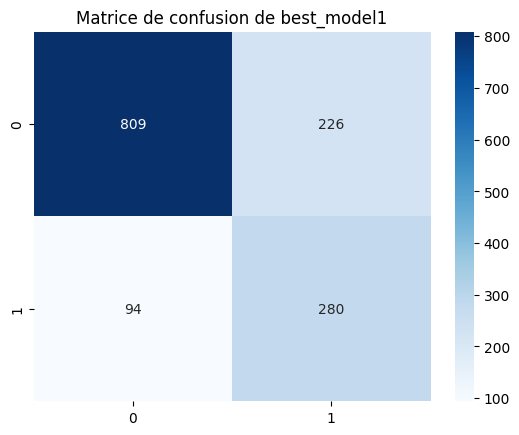

In [ ]:
best_model1=grid.best_estimator_#récupère le model de RandomForestClassifier avec les paramètres trouvés en amont.
print(confusion_matrix(y_test,best_model1.predict(X_test)))
print(classification_report(y_test,best_model1.predict(X_test))) 

plt.figure()
sns.heatmap(confusion_matrix(y_test,best_model1.predict(X_test)),annot=True,cmap='Blues',fmt='.0f')
plt.title('Matrice de confusion de best_model1')
plt.show()

In [84]:
param_grid={
'min_samples_split':[10,20,5],
'min_samples_leaf':[2,4,8],
'n_estimators':[100,400],
'max_features': [None,2,'sqrt'],
'class_weight':[None,'balanced']
}
grid=GridSearchCV(
    RandomForestClassifier(random_state=11),
    param_grid,
    cv=6,
    scoring='precision',
    n_jobs=-1,
)
grid.fit(X_train,y_train)
print("best param:",grid.best_params_)
print("best score:",grid.best_score_)

best param: {'class_weight': None, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
best score: 0.687588103459548


[[967  68]
 [216 158]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1035
           1       0.70      0.42      0.53       374

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



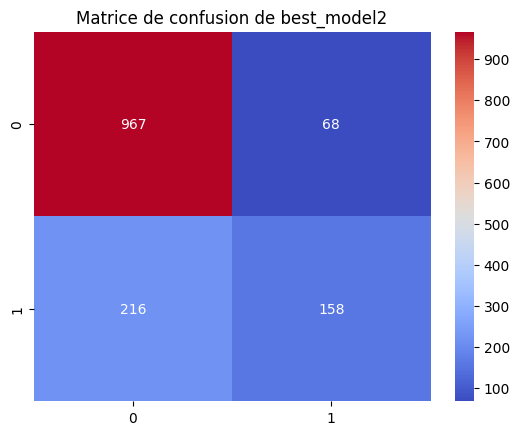

In [85]:
best_model2=grid.best_estimator_
print(confusion_matrix(y_test,best_model2.predict(X_test)))
print(classification_report(y_test,best_model2.predict(X_test))) 

plt.figure()
sns.heatmap(confusion_matrix(y_test,best_model2.predict(X_test)),annot=True,cmap='coolwarm',fmt='.0f')
plt.title('Matrice de confusion de best_model2')
plt.show()

In [86]:
param_grid={
'min_samples_split':[10,20,5],
'min_samples_leaf':[2,4,8],
'n_estimators':[100,400],
'max_features': [None,2,'sqrt'],
'class_weight':[None,'balanced']
}
grid=GridSearchCV(
    RandomForestClassifier(random_state=11),
    param_grid,
    cv=6,
    scoring='accuracy',
    n_jobs=-1,
)
grid.fit(X_train,y_train)
print("best param:",grid.best_params_)
print("best score:",grid.best_score_)

best param: {'class_weight': None, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 100}
best score: 0.8052893148739795


[[954  81]
 [199 175]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.68      0.47      0.56       374

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



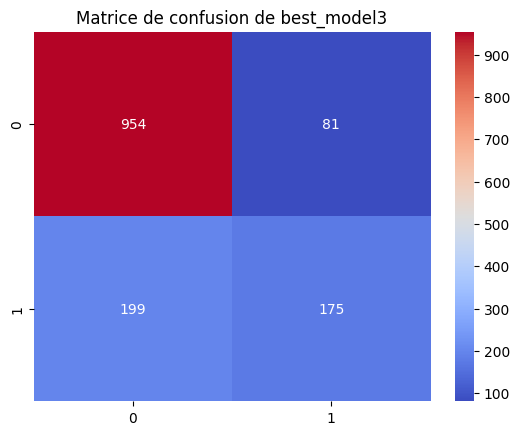

In [87]:
best_model3=grid.best_estimator_
print(confusion_matrix(y_test,best_model3.predict(X_test)))
print(classification_report(y_test,best_model3.predict(X_test))) 

plt.figure()
sns.heatmap(confusion_matrix(y_test,best_model3.predict(X_test)),annot=True,cmap='coolwarm',fmt='.0f')
plt.title('Matrice de confusion de best_model3')
plt.show()

In [88]:
param_grid={
'min_samples_split':[10,20,5],
'min_samples_leaf':[2,4,8],
'n_estimators':[100,400],
'max_features': [None,2,'sqrt'],
'class_weight':[None,'balanced']
}
grid=GridSearchCV(
    RandomForestClassifier(random_state=11),
    param_grid,
    cv=6,
    scoring='recall',
    n_jobs=-1,
)
grid.fit(X_train,y_train)
print("best param:",grid.best_params_)
print("best score:",grid.best_score_)

best param: {'class_weight': 'balanced', 'max_features': 2, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
best score: 0.7678821954484606


[[790 245]
 [ 92 282]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1035
           1       0.54      0.75      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



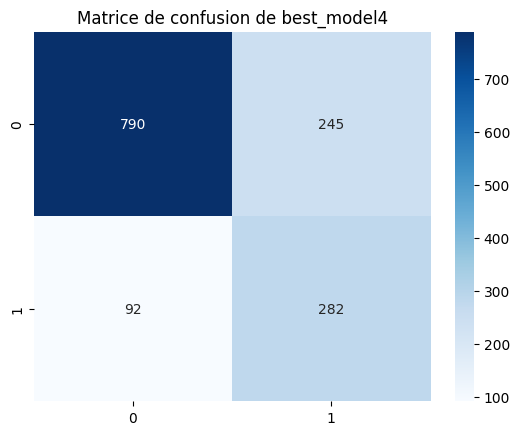

In [89]:
best_model4=grid.best_estimator_
print(confusion_matrix(y_test,best_model4.predict(X_test)))
print(classification_report(y_test,best_model4.predict(X_test))) 

plt.figure()
sns.heatmap(confusion_matrix(y_test,best_model4.predict(X_test)),annot=True,cmap='Blues',fmt='.0f')
plt.title('Matrice de confusion de best_model4')
plt.show()

[[904 131]
 [218 156]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1035
           1       0.54      0.42      0.47       374

    accuracy                           0.75      1409
   macro avg       0.67      0.65      0.66      1409
weighted avg       0.74      0.75      0.74      1409



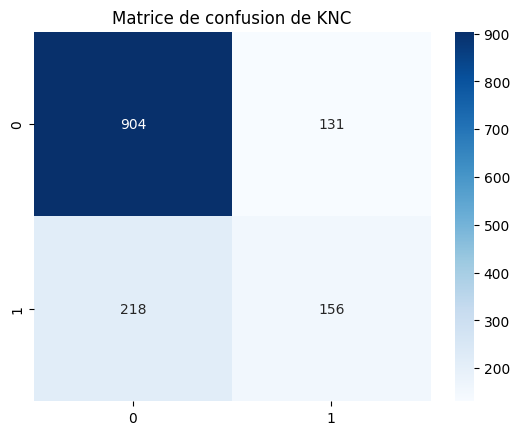

In [92]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print(confusion_matrix(y_test,neigh.predict(X_test)))
print(classification_report(y_test,neigh.predict(X_test)))

plt.figure()
sns.heatmap(confusion_matrix(y_test,neigh.predict(X_test)),annot=True,cmap='Blues',fmt='.0f')
plt.title('Matrice de confusion de KNC')
plt.show()

In [ ]:
#from sklearn import svm
#clf = svm.SVC()
#clf.fit(X_train, y_train)
#print(confusion_matrix(y_test,clf.predict(X_test)))
#print(classification_report(y_test,clf.predict(X_test)))
# Les résultat étaient très étranges, je n'avais jamais vue ça, j'ai préféré geler cette partie.

Nous disposons donc de deux modèles, l'un pour le recall(prendre tous les clients chuners) l'autre pour la precision (pour éviter les fausses alertes qui peuvent être couteuses).

Pour le modèle recall, opter pour best_model4 qui a un score de recall de 0.75 (pour la classe minoritaire).

Pour le modèle précision, opter pour best_model2 qui a un score de precision  de 0.7 (pour la classe minoritaire).